In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import keras as K
from keras.models import Sequential

from keras.layers import Dense

from tensorflow.keras.utils import plot_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datos.xlsx', index_col=0)

In [5]:
print(data.head(5))

                  CODIGO_CAUSA  ... SEXOCOD
CODIGO_ACCIDENTE                ...        
4401423                    115  ...       0
4401423                    104  ...       0
4401420                    157  ...       1
4401420                    112  ...       1
4401429                    157  ...       0

[5 rows x 14 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaa60d6790>,
      dtype=object)

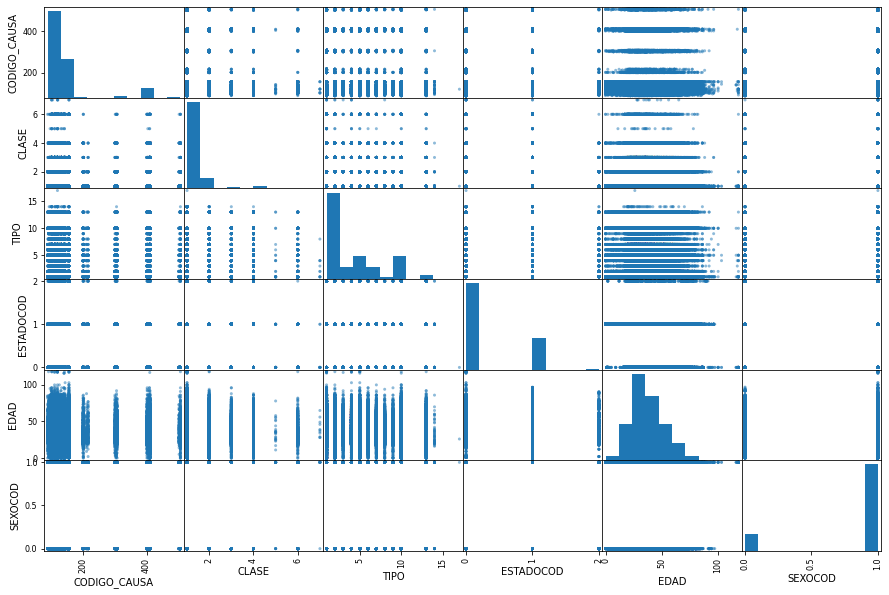

In [6]:
columnasAnalisis = ['CODIGO_CAUSA','CLASE','TIPO','ACTOR_VIAL','ESTADOCOD','EDAD','SEXOCOD']
#columnasAnalisis = ['Survived','Pclass','Sex']
pd.plotting.scatter_matrix(data[columnasAnalisis],figsize=(15,10),marker='.')

In [7]:
actor_vial = pd.get_dummies(data['ACTOR_VIAL'])
dataEliminada = ['DESCRIPCION','DESCRIPCION_GRAVEDAD', 'DESCRIPCION_CLASE','DESCRIPCION_TIPO','ACTOR_VIAL','ESTADO','SEXO']
dataSimplify = data.drop(dataEliminada,axis=1)
dataSimplify.head(5)

,CODIGO_CAUSA,GRAVEDAD,CLASE,TIPO,ESTADOCOD,EDAD,SEXOCOD
CODIGO_ACCIDENTE,,,,,,,
4401423,115,2,2,1.0,1,19,0
4401423,104,2,3,1.0,1,19,0
4401420,157,2,3,1.0,0,20,1
4401420,112,3,1,1.0,0,20,1
4401429,157,2,1,7.0,1,16,0


In [8]:
dataSimplify.isnull().sum()

CODIGO_CAUSA     0
GRAVEDAD         0
CLASE            0
TIPO            75
ESTADOCOD        0
EDAD             0
SEXOCOD          0
dtype: int64

In [9]:
dataSimplify['TIPO'] = dataSimplify['TIPO'].interpolate()
dataSimplify.isnull().sum()

CODIGO_CAUSA    0
GRAVEDAD        0
CLASE           0
TIPO            0
ESTADOCOD       0
EDAD            0
SEXOCOD         0
dtype: int64

In [10]:
dataSimplify.head(10)

,CODIGO_CAUSA,GRAVEDAD,CLASE,TIPO,ESTADOCOD,EDAD,SEXOCOD
CODIGO_ACCIDENTE,,,,,,,
4401423,115,2,2,1.0,1,19,0
4401423,104,2,3,1.0,1,19,0
4401420,157,2,3,1.0,0,20,1
4401420,112,3,1,1.0,0,20,1
4401429,157,2,1,7.0,1,16,0
4401430,139,3,1,10.0,1,16,0
4401425,116,3,1,1.0,0,34,0
4401425,121,3,1,1.0,0,34,0
4401425,157,3,1,10.0,0,34,0


In [11]:
dataSimplify = pd.concat([dataSimplify, actor_vial], axis = 1)
dataSimplify.head(10)

,CODIGO_CAUSA,GRAVEDAD,CLASE,TIPO,ESTADOCOD,EDAD,SEXOCOD,CICLISTA,CONDUCTOR,MOTOCICLISTA,PASAJERO/ACOMPAÑANTE,PEATON
CODIGO_ACCIDENTE,,,,,,,,,,,,
4401423,115,2,2,1.0,1,19,0,0,0,0,0,1
4401423,104,2,3,1.0,1,19,0,0,0,0,0,1
4401420,157,2,3,1.0,0,20,1,0,1,0,0,0
4401420,112,3,1,1.0,0,20,1,0,1,0,0,0
4401429,157,2,1,7.0,1,16,0,0,0,0,1,0
4401430,139,3,1,10.0,1,16,0,0,0,0,1,0
4401425,116,3,1,1.0,0,34,0,0,0,1,0,0
4401425,121,3,1,1.0,0,34,0,0,0,1,0,0
4401425,157,3,1,10.0,0,34,0,0,0,1,0,0


In [11]:
#parametroEntrada = ['GRAVEDAD','CLASE','TIPO','ESTADOCOD','EDAD','SEXOCOD','CICLISTA','CONDUCTOR','MOTOCICLISTA','PASAJERO/ACOMPAÑANTE','PEATON']
parametroEntrada = ['GRAVEDAD','CLASE','TIPO','ESTADOCOD','EDAD','SEXOCOD']
etiqueta  = 'CODIGO_CAUSA'

In [12]:
X = dataSimplify[parametroEntrada].values
y = dataSimplify[etiqueta].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print(y_train)

[112 121 157 ... 121 121 121]


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [15]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='sgd',learning_rate='constant',random_state=1)

In [68]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1,
              solver='sgd')

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

In [71]:
print("Accuracy of MLPClassifier :", accuracy(cm))

Accuracy of MLPClassifier : 0.22678820692864093


In [16]:
model = Sequential()
init = K.initializers.glorot_uniform(seed=1)
model.add(Dense(12,input_dim=6, kernel_initializer=init, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer=init,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64,kernel_initializer=init,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,kernel_initializer=init,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer=init,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer=init,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(108,kernel_initializer=init,activation='softmax'))
#model.build()

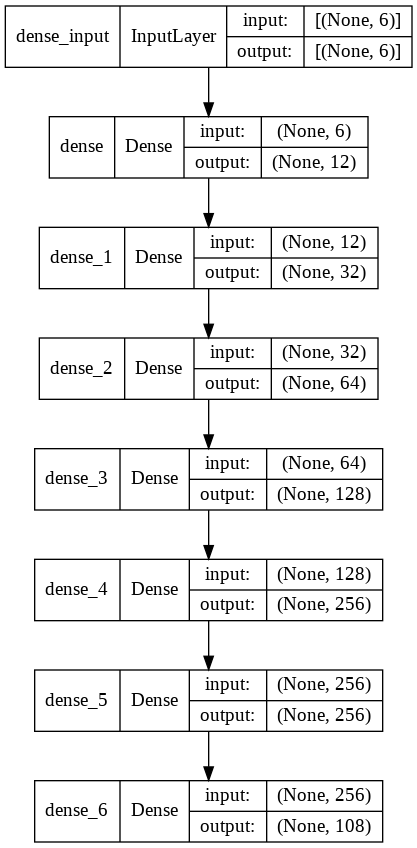

In [17]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [18]:
#model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=100,batch_size=1, verbose=1)
#model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=1, shuffle=True, verbose=1)

Epoch 1/50
110324/110324 [==============================] - 283s 3ms/step - loss: 29613.2695 - accuracy: 0.0023
Epoch 2/50
110324/110324 [==============================] - 276s 3ms/step - loss: 29613.1855 - accuracy: 5.8011e-04
Epoch 3/50
 94154/110324 [========================>.....] - ETA: 40s - loss: 29621.0195 - accuracy: 2.2304e-04

KeyboardInterrupt: ignored

In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Model loss: %.2f, Accuracy: %.2f' % ((loss*100),(accuracy*100)))

Model loss: nan, Accuracy: 0.00
